# Analyse des fr√©quences et du contexte d'apparition des mots 

In [59]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
import numpy as np
import plotly.express as px 
import spacy
from spacy import displacy
from nltk.probability import FreqDist
import plotly.express as px
from wordcloud import ImageColorGenerator
from PIL import Image
from nltk.text import Text
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from spacy import displacy

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ambre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ambre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ambre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Importation des donn√©es 

### Base de donn√©es "now"

In [70]:
df_now = pd.read_csv("C:/Users/Ambre/Downloads/ProjetTextMining-dev/ProjetTextMining-dev/data_chatgpt_now.csv")


mots_now = []

for element in df_now['Tweet']:
    if isinstance(element, str):
        mots_now.extend(element.split())

# Liste de tous les mots de la base de donn√©es pr√©-trait√©e 
#print(mots_now) 

### Base de donn√©es "before"

In [69]:
df_before = pd.read_csv("C:/Users/Ambre/Downloads/ProjetTextMining-dev/ProjetTextMining-dev/data_chatgpt_before.csv")


mots_before = []

for element in df_before['Tweet']:
    if isinstance(element, str):
        mots_before.extend(element.split())

# Liste de tous les mots de la base de donn√©es pr√©-trait√©e 
#print(mots_now) 

## Nuage de mots => version finale : Tangi

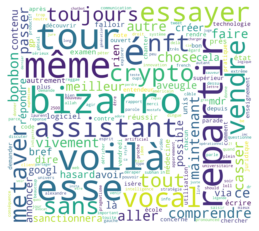

In [13]:
tokens_now = mots_now.copy()
tokens_before = mo

mask = np.array(Image.open("C:/Users/Ambre/Downloads/ProjetTextMining-dev/ProjetTextMining-dev/twi5.png"))
wordcloud = WordCloud(mask=mask, background_color="white", color_func = None).generate_from_frequencies(dict(zip(tokens, [1]*len(tokens))))
image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

## Graphique des d√©pendances 

On r√©alise le graphique des d√©pendances sur seulement 1000 mots => √ßa fait planter jupyter si on fait sur tous les mots 

### "now"

In [72]:
#nlp = spacy.load("fr_core_news_sm", max_length=2000000)
nlp = spacy.load("fr_core_news_sm")
nlp.max_length = 2000000
chaine = " ".join(mots_now[1:1000])
doc = nlp(chaine)
print(displacy.render(doc, style='dep', jupyter=True, options={'distance': 130}))

None


### "before"

In [73]:
nlp = spacy.load("fr_core_news_sm")
nlp.max_length = 2000000
chaine = " ".join(mots_before[1:1000])
doc = nlp(chaine)
print(displacy.render(doc, style='dep', jupyter=True, options={'distance': 130}))

None


## Analyse des fr√©quences 

### "now"

[('avoir', 3566), ('faire', 2307), ('googl', 2284), ('ia', 1922), ('plus', 1755), ('pouvoir', 1526), ('cela', 1338), ('aller', 1281), ('tout', 1239), ('bard', 1093)]


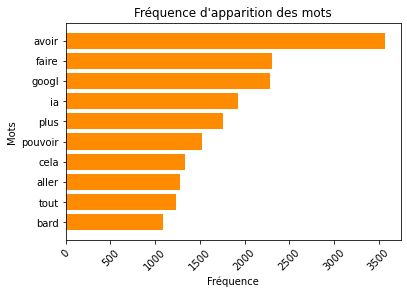

[('avoir', 3566), ('faire', 2307), ('googl', 2284), ('ia', 1922), ('plus', 1755), ('pouvoir', 1526), ('cela', 1338), ('aller', 1281), ('tout', 1239), ('bard', 1093), ('via', 1036), ('intelligence', 1028), ('artificiel', 955), ('microsoft', 954), ('r√©ponse', 902), ('si', 820), ('comme', 817), ('openai', 782), ('lancer', 777), ('nouveau', 766), ('utiliser', 758), ('outil', 758), ('bing', 751), ('recherche', 738), ('√™tre', 685), ('dire', 634), ('√©crire', 628), ('ce', 621), ('voir', 611), ('comment', 601)]


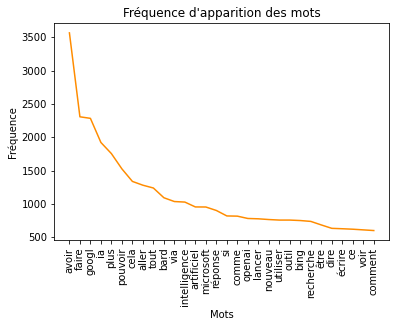

In [74]:
# Comptage de la fr√©quence d'apparition des mots
word_counts = nltk.FreqDist(mots_now)

# Afficher les 10 mots les plus fr√©quents
print(word_counts.most_common(10))
top_10 = word_counts.most_common(10)

# Graphique des fr√©quences 
plt.barh(list(zip(*top_10))[0], list(zip(*top_10))[1], color = "darkorange")
plt.title("Fr√©quence d'apparition des mots")
plt.xlabel("Fr√©quence")
plt.ylabel("Mots")
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

# Exportation du graphique
#plt.savefig('graphique1.png')

# Afficher les 30 mots les plus fr√©quents 
print(word_counts.most_common(30))
top_30 = word_counts.most_common(30)

# Graphique : fr√©quence d'apparition des 30 mots les plus fr√©quents 
plt.plot(list(zip(*top_30))[0], list(zip(*top_30))[1], color = "darkorange")
plt.title("Fr√©quence d'apparition des mots")
plt.xlabel("Mots")
plt.ylabel("Fr√©quence")
plt.xticks(rotation=90)
#plt.show()

# Exportation du graphique
#plt.savefig('graphique2.jpg')

fig = px.bar(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fr√©quence d'apparition des 30 mots les plus fr√©quents", labels = dict(x = "Mots", y = "Fr√©quence d'apparition"), color_discrete_sequence = ["#22DEEE"])
#fig.show()

fig = px.line(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fr√©quence d'apparition des 30 mots les plus fr√©quents", labels = dict(x = "Mots", y = "Fr√©quence d'apparition"), color_discrete_sequence = ["#22DEEE"])
#fig.show()

### "before"

[('avoir', 1393), ('faire', 1021), ('ia', 846), ('pouvoir', 749), ('tout', 734), ('aller', 659), ('cela', 657), ('plus', 550), ('intelligence', 449), ('question', 431)]


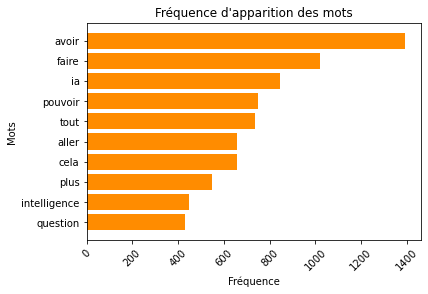

[('avoir', 1393), ('faire', 1021), ('ia', 846), ('pouvoir', 749), ('tout', 734), ('aller', 659), ('cela', 657), ('plus', 550), ('intelligence', 449), ('question', 431), ('r√©ponse', 426), ('artificiel', 425), ('√©crire', 406), ('si', 387), ('ce', 370), ('demander', 367), ('nouveau', 361), ('openai', 359), ('comme', 338), ('bon', 291), ('voir', 284), ('savoir', 284), ('bien', 280), ('tester', 280), ('comment', 275), ('dire', 272), ('tr√®s', 269), ('aussi', 267), ('√™tre', 267), ('via', 258)]


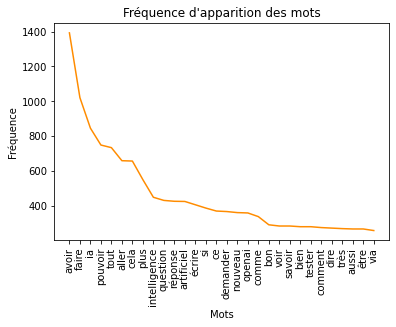

In [77]:
# Comptage de la fr√©quence d'apparition des mots
word_counts = nltk.FreqDist(mots_before)

# Afficher les 10 mots les plus fr√©quents
print(word_counts.most_common(10))
top_10 = word_counts.most_common(10)

# Graphique des fr√©quences 
plt.barh(list(zip(*top_10))[0], list(zip(*top_10))[1], color = "darkorange")
plt.title("Fr√©quence d'apparition des mots")
plt.xlabel("Fr√©quence")
plt.ylabel("Mots")
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.show()

# Exportation du graphique
#plt.savefig('graphique1.png')

# Afficher les 30 mots les plus fr√©quents 
print(word_counts.most_common(30))
top_30 = word_counts.most_common(30)

# Graphique : fr√©quence d'apparition des 30 mots les plus fr√©quents 
plt.plot(list(zip(*top_30))[0], list(zip(*top_30))[1], color = "darkorange")
plt.title("Fr√©quence d'apparition des mots")
plt.xlabel("Mots")
plt.ylabel("Fr√©quence")
plt.xticks(rotation=90)
plt.show()

# Exportation du graphique
#plt.savefig('graphique2.jpg')

fig = px.bar(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fr√©quence d'apparition des 30 mots les plus fr√©quents", labels = dict(x = "Mots", y = "Fr√©quence d'apparition"), color_discrete_sequence = ["#22DEEE"])
#fig.show()

fig = px.line(x = list(zip(*top_30))[0], y = list(zip(*top_30))[1], title = "Fr√©quence d'apparition des 30 mots les plus fr√©quents", labels = dict(x = "Mots", y = "Fr√©quence d'apparition"), color_discrete_sequence = ["#22DEEE"])
#fig.show()

## Contexte d'apparition des mots => A faier avec tweets non tokenis√©s 

### "now"

In [80]:
# Importation des donn√©es 
df_phrases_now = pd.read_csv("C:/Users/Ambre/Downloads/ProjetTextMining-dev/ProjetTextMining-dev/data_chatgpt_now_phrase.csv")

phrases_now = []

for element in df_phrases_now['Tweet']:
    if isinstance(element, str):
        phrases_now.extend(element.split())

In [88]:
contexte = Text(phrases_now)
contexte.concordance("innovation") # renvoie resultats similaires √† ceux du poly 

Displaying 25 of 41 matches:
ificielle ChatGPT en examen : une innovation qui questionne le syst√®me univers
Microsoft sur ChatGPT et Bing l ' innovation qui bouscule le monde de la Tech 
nt quand m√™me important ." üéôÔ∏è l ' innovation qui bouscule le monde de la Tech 
ificielle ChatGPT en examen : une innovation qui questionne le syst√®me univers
er d√Æner - d√©bat 2023 avec hier ! Innovation , intelligence artificielle et √©t
 imbriquer la r√©gulation avec l ‚Äô innovation ". invit√© de dans et : ne confiez
ution ou un robot √† " bullshit "? Innovation ‚Äì ChatGPT atteint 100 millions d 
‚Äô est √† dire la cr√©ativit√© ou l ‚Äô innovation ." L ' dit oui √† ! Pour Thierry B
e dis üò≠ Dans la t√™te des gens l ' innovation , le truc qui d√©chire , c ' est c
teur g√©n√©ral adjoint Strat√©gie et Innovation sera l ' invit√© de Michel Geyer s
 we ‚Äô ll continue to be bold with innovation and responsible in our approach "
√©es en place " n ' a rien d ' une innovation radicale " La Tech 

### before

In [89]:
# Importation des donn√©es 
df_phrases_before = pd.read_csv("C:/Users/Ambre/Downloads/ProjetTextMining-dev/ProjetTextMining-dev/data_chatgpt_before_phrase.csv")

phrases_before = []

for element in df_phrases_before['Tweet']:
    if isinstance(element, str):
        phrases_before.extend(element.split())

In [90]:
contexte = Text(phrases_before)
contexte.concordance("innovation") # renvoie resultats similaires √† ceux du poly 

Displaying 15 of 15 matches:
Astrid aurait √©t√© aussi une belle innovation :( Hier , apr√®s avoir fait une pr
deduire que ChatGPT est une vraie innovation de rupture . Et bien √ßa serait un
 En 30 ans de journalisme sur l ' innovation et les technologies , c ' est mon
de ses limites " directeur de l ' innovation üëâüèª Chatgpt : le chatbot mi - ia ,
tement de chatGPT ChatGPT est l ‚Äô innovation du si√®cle ChatGPT est une applica
e Change my mind . Quelle est l ‚Äô innovation la plus bluffante de ces derni√®re
cophone sur le | | Carnets de l ‚Äô innovation - Blog Philippe Labouch√®re J ' ai
l d ‚Äô OpenAI est certainement l ' innovation de l ' ann√©e . Sauf qu ' OpenAI n
 foison . That ' s groundbreaking innovation ! Je sais pas ... Est - ce qu ' i
 ce soit un progr√®s ? üòâ Progr√®s ‚â† innovation üßê J ' ai fait mienne la d√©finitio
sans compter la r√©p√©tition de l ' innovation dans deux ¬ß sur 3 ) C ' est quoi 
s trucage ‚¨áÔ∏è Bon , donc la grosse innovation m√©dia en 2023 ce